<a href="https://colab.research.google.com/github/Kritkikomo/Association_rules_datamaster/blob/main/Unsupervised_Learning_Association_rules_Homework_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Association rules
This is one of the datamaster course Homework. In this notebook, you will explore about how I create a assocaition rule and get the insight from it step by step.

## Step 1 :Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations


In [2]:
# Around 2 min.
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx')

In [3]:
print(df.head())
print(df.info())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invo

## Step 2.1 : Data cleansing
In this section, I only choose the United Kingdom to analyse.

- Clear any entries with N/A.
- Convert the `StockCode` column type to `string`.
    - `df['StockCode'].astype('string')`
- Choose only invoices in `United Kingdom`.
    - Hint: There are `379423` invoices.
- Create a list of StockCodes in each invoice. We will pass this to the Apriori algorithm.
    - Hint: Transction `489434` has the following stock code list `['85048', '79323P', '79323W', '22041', '21232', '22064', '21871', '21523']`
- Set the support to `0.005` and confidence to `0.5`
    - You may try with different numbers. However, small support means more samples required to make the pattern be **interesting**.

In [4]:
df = df.dropna()# Drop N/A

df['StockCode']=df['StockCode'].astype('string')# Convert 'StockCode' column to 'string'
df = df[df['Country']=='United Kingdom']# Choose only rows where 'Country' is 'United Kingdom'



<ipython-input-4-4a17dd0d92f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StockCode']=df['StockCode'].astype('string')# Convert 'StockCode' column to 'string'


In [5]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


## Step 2.2 : Preparing the data
After we clean the data, Next step is preparing the data to use in Apriori library

In [40]:
# Create a list to stock codes for each invoice
transactions = df.groupby('Invoice')['StockCode'].apply(list)
# Change each transaction to list
trans = transactions.to_list() 



In [39]:
transactions

Invoice
489434     [85048, 79323P, 79323W, 22041, 21232, 22064, 2...
489435                          [22350, 22349, 22195, 22353]
489436     [48173C, 21755, 21754, 84879, 22119, 22142, 22...
489437     [22143, 22145, 22130, 21364, 21360, 21351, 213...
489438     [21329, 21252, 21100, 21033, 20711, 21410, 214...
                                 ...                        
C538119                                [22633, 22865, 21777]
C538121                                              [22461]
C538122                                              [22444]
C538124                                    [M, 22699, 22423]
C538164                                             [35004B]
Name: StockCode, Length: 21481, dtype: object

# Step 3 Processing the data
## Step 3.1 Extract the Association rules
In this step we will use the apriori library to extract the insight from the transaction list that we created

In [9]:
!pip install efficient-apriori==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from efficient_apriori import apriori

In [11]:
# pass the transaction list to apriori algorithm, set the min_support at min_confidence
# e.g. if
# - trans_list is the transaction list variable
# - min_support is 0.05
# - min_confidence is 0.5

itemsets, rules = apriori(trans, min_support=0.005, min_confidence=0.5)


In [12]:
rules

[{15056N} -> {15056BL},
 {15056BL} -> {15056N},
 {20679} -> {15056BL},
 {15056P} -> {15056N},
 {20679} -> {15056N},
 {20674} -> {20675},
 {20674} -> {20676},
 {20674} -> {20677},
 {20675} -> {20676},
 {20677} -> {20675},
 {20675} -> {20677},
 {20675} -> {21240},
 {21244} -> {20675},
 {20677} -> {20676},
 {21242} -> {20676},
 {20677} -> {21239},
 {21243} -> {20677},
 {20711} -> {85099B},
 {20712} -> {85099B},
 {20713} -> {85099B},
 {20717} -> {20718},
 {20719} -> {20724},
 {20719} -> {22355},
 {20723} -> {20724},
 {22356} -> {20724},
 {20726} -> {20725},
 {20727} -> {20725},
 {20728} -> {20725},
 {22384} -> {20725},
 {20967} -> {20969},
 {20970} -> {20969},
 {20969} -> {20970},
 {20971} -> {20972},
 {20973} -> {20974},
 {20975} -> {20974},
 {20974} -> {20975},
 {20983} -> {20982},
 {20982} -> {20983},
 {21078} -> {21080},
 {21086} -> {21080},
 {21094} -> {21080},
 {21094} -> {21086},
 {21086} -> {21094},
 {21122} -> {21121},
 {21121} -> {21122},
 {21124} -> {21121},
 {21121} -> {21124},

In [13]:
# Codes to find the answer of the following questions
# - How many itemsets of length 1 if we set the min_support=0.005 and min_confidence=0.5
print('The length 1 has {} itemsets.'.format(len(itemsets[1])))
# - How many items in the longest itemsets?
longest_itemsets =list(itemsets.keys())[-1]
freq_longest = sum(itemsets[longest_itemsets].values())
print('The longest itemsets has {} items which appears {} times.'.format(longest_itemsets,freq_longest))
# - How many rules can we extract from the data if we set the min_support=0.005 and min_confidence=0.5
print('The data consists {} rules.'.format(len(rules)))


The length 1 has 989 itemsets.
The longest itemsets has 5 items which appears 114 times.
The data consists 1145 rules.


## 3.2 Preparing more data for analytic

Create the Stock_df to parse the stock code in to the Description in order to facilitate the user.

In [14]:
# Find reference stock code description
stock_df = df[['StockCode', 'Description']].drop_duplicates(ignore_index=True).set_index('StockCode')
stock_df

,Description
StockCode,
85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS
79323P,PINK CHERRY LIGHTS
79323W,WHITE CHERRY LIGHTS
22041,"RECORD FRAME 7"" SINGLE SIZE"
21232,STRAWBERRY CERAMIC TRINKET BOX
...,...
22937,BAKING MOULD CHOCOLATE CUPCAKES
22936,BAKING MOULD ROSE WHITE CHOCOLATE
22935,BAKING MOULD ROSE MILK CHOCOLATE


Create the indicator for Quantity and Price of each item in order to use this indicator to weight the Association rule.

In [15]:
## this Data frame is a reference for price and quantity for each stockcode over all data
Price_Quan = df.groupby('StockCode')[['Quantity','Price']].agg(['mean','median',pd.Series.mode])


In [16]:
Price_Quan.loc['15056N']

Quantity  mean      14.271949
          median          3.0
          mode              3
Price     mean       5.706424
          median         5.95
          mode           5.95
Name: 15056N, dtype: object

##### Total_value is a estimated value of each stock_item caculated by 
###### This value will use in the macro marketing section which we will use this value to evalute the rank of the rule
$$ Totalvalue = med(Quantity)*mode(Price) $$

In [17]:
###create total value of each StockCode 
total_value=pd.DataFrame()
total_value['val']=Price_Quan['Quantity']['median']*Price_Quan['Price']['mode']

In [18]:
total_value

,val
StockCode,
10002,10.2
10080,0.85
10109,1.68
10120,1.05
10123C,0.65
...,...
PADS,0.001
POST,"[-4.41, -5.0]"
SP1002,7.375


###### In this section, I add the data_list to collect the data from each rule to evalute in the next step each of the dict in this list is

*   lhs_code = the antecedent item code
*   rhs_code = the consequent item code
*   lhs = the name of antecedent item 
* lhs = the name of consequent item 
* rule = rule of the itemset
* Supp = Support of the rule
* Conf = Confidence of the rule
* lift = lift of the rule
* conviction = conviction of the rule
* totalval = the estimated value of the consequent item



In [42]:
# rules is the association rules from the apriori algorithm
data_list = []
for i, rule in enumerate(rules):
    print('Rule {}'.format(i+1))
    totalval =0
    for stockcode in list(rule.rhs):
      totalval += total_value.loc[stockcode]['val']
    lhs = '/'.join(stock_df.loc[list(rule.lhs)].values.reshape(-1)) # antecedent
    rhs = '/'.join(stock_df.loc[list(rule.rhs)].values.reshape(-1)) # consequent
    temp_dict = {}
    temp_dict['lhs_code']=set(rule.lhs)
    temp_dict['rhs_code']=list(rule.rhs)
    temp_dict['lhs']=lhs
    temp_dict['rhs']=rhs
    temp_dict['rule']='{} -> {}'.format(lhs, rhs)
    temp_dict['Supp']=rule.support
    temp_dict['Conf']=rule.confidence
    temp_dict['lift']=rule.lift
    temp_dict['conviction']=rule.conviction
    temp_dict['totalval']=totalval

    data_list.append(temp_dict)
    # antecedent -> consequent
    print('{} -> {}'.format(lhs, rhs))
    
    print('Supp = {}, Conf = {}, Lift = {}, Conv = {}'.format(rule.support, rule.confidence, rule.lift, rule.conviction))
    print()

Rule 1
EDWARDIAN PARASOL NATURAL -> EDWARDIAN PARASOL BLACK
Supp = 0.011079558679763513, Conf = 0.5107296137339056, Lift = 23.746716087917804, Conv = 1.9999015817284251

Rule 2
EDWARDIAN PARASOL BLACK -> EDWARDIAN PARASOL NATURAL
Supp = 0.011079558679763513, Conf = 0.5151515151515151, Lift = 23.746716087917804, Conv = 2.0177569671153184

Rule 3
EDWARDIAN PARASOL RED -> EDWARDIAN PARASOL BLACK
Supp = 0.010381267166333039, Conf = 0.6947040498442367, Lift = 32.30073094091786, Conv = 3.205062555471331

Rule 4
EDWARDIAN PARASOL PINK -> EDWARDIAN PARASOL NATURAL
Supp = 0.00567943764256785, Conf = 0.6931818181818182, Lift = 31.95330179477175, Conv = 3.188554215823091

Rule 5
EDWARDIAN PARASOL RED -> EDWARDIAN PARASOL NATURAL
Supp = 0.007960523253107397, Conf = 0.5327102803738317, Lift = 24.556114877060686, Conv = 2.0935757135961874

Rule 6
GREEN SPOTTY BOWL/GREEN POLKADOT BOWL -> BLUE SPOTTY BOWL/BLUE POLKADOT BOWL
Supp = 0.0060053070155020715, Conf = 0.7087912087912088, Lift = 57.67251498501

# Additional Section


## Step 4 Get more Insight!
##### This section is aimed to identify which itemset should be promote and for each customer which item should be promoted
##### In order to weigh the rule I define the 2 parameter which are

*   Exp_val_Supp : Expected value with Support is the value that to prioritize the rule based on the "frequency" and created from 
$$ Expected value with Support = Support of rule*Estimate value of added itemset $$
normally, we want the support and the added value to be high to make sure that the frequncey of the instace and profit would be more. The higher of this parameter the better
*   Exp_val_Conf : Expected value with Confidence is the value that to prioritize the rule based on the "Confidence" that the rule would appear  and created from
$$ Expected value with Confidence = confidence of rule*Estimate value of added itemset $$
normally, we want the Confidence and the added value to be high to make sure that the instance would likely to happen and profit would be more. The higher of this parameter the better



In [20]:
rules_df = pd.DataFrame(data_list)
rules_df['Exp_val_Supp']=rules_df['Supp']*rules_df['totalval']
rules_df['Exp_val_Conf']=rules_df['Conf']*rules_df['totalval']

In [21]:
rules_df

,lhs_code,rhs_code,lhs,rhs,rule,Supp,Conf,lift,conviction,totalval,Exp_val_Supp,Exp_val_Conf
0,{15056N},[15056BL],EDWARDIAN PARASOL NATURAL,EDWARDIAN PARASOL BLACK,EDWARDIAN PARASOL NATURAL -> EDWARDIAN PARASOL...,0.011080,0.510730,23.746716,1.999902,17.85,0.197770,9.116524
1,{15056BL},[15056N],EDWARDIAN PARASOL BLACK,EDWARDIAN PARASOL NATURAL,EDWARDIAN PARASOL BLACK -> EDWARDIAN PARASOL N...,0.011080,0.515152,23.746716,2.017757,17.85,0.197770,9.195455
2,{20679},[15056BL],EDWARDIAN PARASOL RED,EDWARDIAN PARASOL BLACK,EDWARDIAN PARASOL RED -> EDWARDIAN PARASOL BLACK,0.010381,0.694704,32.300731,3.205063,17.85,0.185306,12.400467
3,{15056P},[15056N],EDWARDIAN PARASOL PINK,EDWARDIAN PARASOL NATURAL,EDWARDIAN PARASOL PINK -> EDWARDIAN PARASOL NA...,0.005679,0.693182,31.953302,3.188554,17.85,0.101378,12.373295
4,{20679},[15056N],EDWARDIAN PARASOL RED,EDWARDIAN PARASOL NATURAL,EDWARDIAN PARASOL RED -> EDWARDIAN PARASOL NAT...,0.007961,0.532710,24.556115,2.093576,17.85,0.142095,9.508879
...,...,...,...,...,...,...,...,...,...,...,...,...
1140,"{82494L, 82486, 82483}","[82482, 85123A]",WOOD 2 DRAWER CABINET WHITE FINISH/WOOD S/3 CA...,WOODEN PICTURE FRAME WHITE FINISH/WHITE HANGIN...,WOOD 2 DRAWER CABINET WHITE FINISH/WOOD S/3 CA...,0.005307,0.506667,28.566159,1.991074,33.00,0.175132,16.720000
1141,"{85123A, 82482, 82486}","[82483, 82494L]",WOODEN PICTURE FRAME WHITE FINISH/WOOD S/3 CAB...,WOOD 2 DRAWER CABINET WHITE FINISH/WOODEN FRAM...,WOODEN PICTURE FRAME WHITE FINISH/WOOD S/3 CAB...,0.005307,0.770270,55.711029,4.292757,41.50,0.220241,31.966216
1142,"{82494L, 82482, 82486}","[82483, 85123A]",WOODEN PICTURE FRAME WHITE FINISH/WOOD S/3 CAB...,WOOD 2 DRAWER CABINET WHITE FINISH/WHITE HANGI...,WOODEN PICTURE FRAME WHITE FINISH/WOOD S/3 CAB...,0.005307,0.511211,40.224609,2.019871,41.50,0.220241,21.215247
1143,"{85123A, 82482, 82483}","[82486, 82494L]",WOODEN PICTURE FRAME WHITE FINISH/WOOD 2 DRAWE...,WOOD S/3 CABINET ANT WHITE FINISH/WOODEN FRAME...,WOODEN PICTURE FRAME WHITE FINISH/WOOD 2 DRAWE...,0.005307,0.735484,50.315061,3.725226,33.60,0.178316,24.712258


Plot the confidence and support to see the relationship between its. Moreover, plot the histogram to see the count of the parameters.

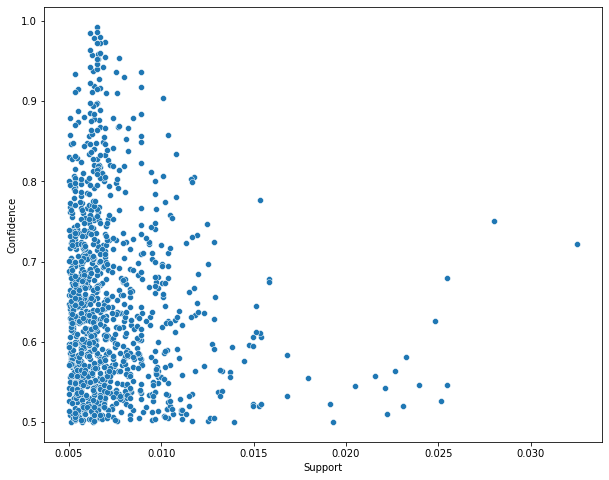

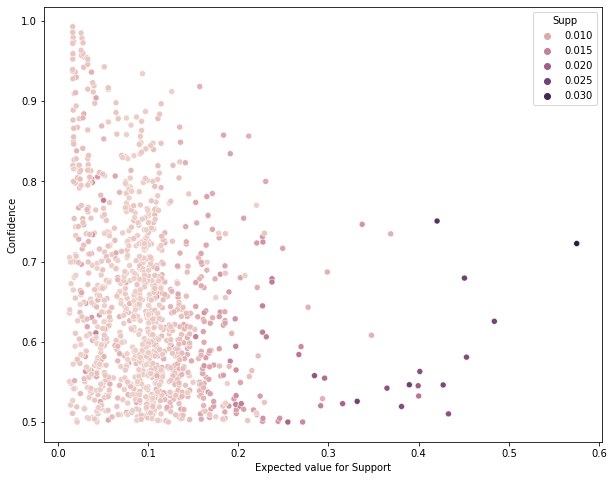

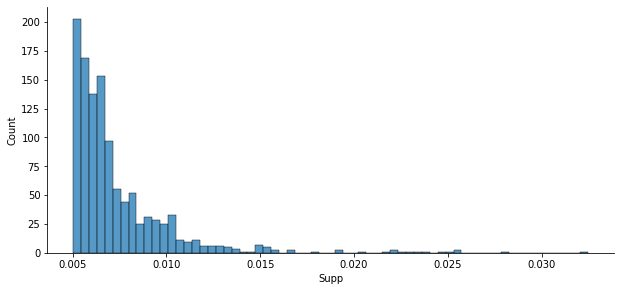

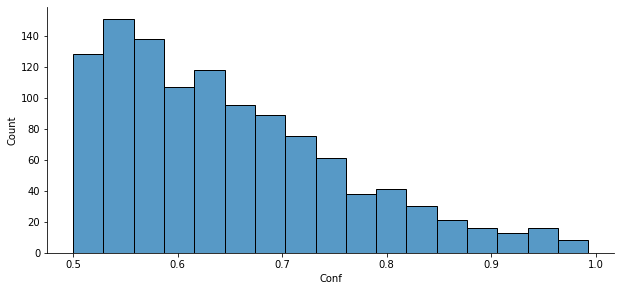

In [22]:
fig,ax =plt.subplots()

sns.scatterplot(data=rules_df,x='Supp',y='Conf')
ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
fig = plt.gcf()
fig.set_size_inches(10,8 )
fig,ax =plt.subplots()

sns.scatterplot(data=rules_df,x='Exp_val_Supp',y='Conf',hue='Supp')
ax.set_xlabel('Expected value for Support')
ax.set_ylabel('Confidence')
fig = plt.gcf()
fig.set_size_inches(10,8 )

sns.displot(rules_df['Supp'])
fig = plt.gcf()
fig.set_size_inches(9.5,4 )
sns.displot(rules_df['Conf'])
fig = plt.gcf()
fig.set_size_inches(9.5,4 )

plt.show()

## For mass marketing
##### the section below is aimed to use the strategy on the mass amout of people which we will aim for the higher frequency of item purchasing that why we focus on Expected value with support(Exp_val_Supp)
##### For_mass is the dataframe that used for the mass amout of people For Example  strategize the marketing campaign in the supermarket because this dataframe is sorted from the exp_val_supp which base on support which related to the frequency of the rule  

In [23]:
For_mass=rules_df.sort_values(['Exp_val_Supp','Conf'],ascending=False)

In [24]:
For_mass

,lhs_code,rhs_code,lhs,rhs,rule,Supp,Conf,lift,conviction,totalval,Exp_val_Supp,Exp_val_Conf
113,{21733},[85123A],RED HANGING HEART T-LIGHT HOLDER,WHITE HANGING HEART T-LIGHT HOLDER,RED HANGING HEART T-LIGHT HOLDER -> WHITE HANG...,0.032494,0.722567,5.156634,3.099404,17.70,0.575141,12.789441
321,{85099F},[85099B],JUMBO BAG STRAWBERRY,JUMBO BAG RED WHITE SPOTTY /RED RETROSPOT JUMB...,JUMBO BAG STRAWBERRY -> JUMBO BAG RED WHITE SP...,0.024813,0.625587,8.269681,2.468802,19.50,0.483846,12.198944
176,{22386},[85099B],JUMBO BAG PINK WITH WHITE SPOTS/JUMBO BAG PINK...,JUMBO BAG RED WHITE SPOTTY /RED RETROSPOT JUMB...,JUMBO BAG PINK WITH WHITE SPOTS/JUMBO BAG PINK...,0.023230,0.580908,7.679068,2.205606,19.50,0.452982,11.327707
289,{82482},[82494L],WOODEN PICTURE FRAME WHITE FINISH,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH -> WOODEN FR...,0.025464,0.679503,14.581824,2.974758,17.70,0.450719,12.027205
133,{21931},[85099B],JUMBO STORAGE BAG SUKI,JUMBO BAG RED WHITE SPOTTY /RED RETROSPOT JUMB...,JUMBO STORAGE BAG SUKI -> JUMBO BAG RED WHITE ...,0.022206,0.510160,6.743850,1.887050,19.50,0.433011,9.948128
...,...,...,...,...,...,...,...,...,...,...,...,...
319,{85049C},[85049D],ROMANTIC PINKS RIBBONS,BRIGHT BLUES RIBBONS,ROMANTIC PINKS RIBBONS -> BRIGHT BLUES RIBBONS,0.005726,0.521186,45.510593,2.064578,2.50,0.014315,1.302966
265,{22754},[22753],SMALL RED BABUSHKA NOTEBOOK,SMALL YELLOW BABUSHKA NOTEBOOK,SMALL RED BABUSHKA NOTEBOOK -> SMALL YELLOW B...,0.005214,0.640000,83.828293,2.756570,2.55,0.013295,1.632000
191,{22524},[22520],CHILDRENS GARDEN GLOVES BLUE,CHILDS GARDEN TROWEL BLUE,CHILDRENS GARDEN GLOVES BLUE -> CHILDS GARDEN ...,0.005121,0.705128,74.615069,3.359256,2.55,0.013058,1.798077
201,{22525},[22523],CHILDRENS GARDEN GLOVES PINK,CHILDS GARDEN FORK PINK,CHILDRENS GARDEN GLOVES PINK -> CHILDS GARDEN ...,0.005121,0.635838,73.829402,2.722382,2.55,0.013058,1.621387


## For micro marketing
##### the section below is aimed to use the strategy on the micro marketing which aim for the chance of the items purchasing. we will focus on Expected value with confidence parameter(Exp_val_Conf)
##### For_ind is the dataframe that used for individual customer For Example  strategize the marketing campaign for each of customer.

In [25]:
For_ind=rules_df.sort_values(['Exp_val_Conf','Conf'],ascending=False)

In [26]:
For_ind

,lhs_code,rhs_code,lhs,rhs,rule,Supp,Conf,lift,conviction,totalval,Exp_val_Supp,Exp_val_Conf
1141,"{85123A, 82482, 82486}","[82483, 82494L]",WOODEN PICTURE FRAME WHITE FINISH/WOOD S/3 CAB...,WOOD 2 DRAWER CABINET WHITE FINISH/WOODEN FRAM...,WOODEN PICTURE FRAME WHITE FINISH/WOOD S/3 CAB...,0.005307,0.770270,55.711029,4.292757,41.50,0.220241,31.966216
1108,"{82482, 82486}","[82483, 82494L]",WOODEN PICTURE FRAME WHITE FINISH/WOOD S/3 CAB...,WOOD 2 DRAWER CABINET WHITE FINISH/WOODEN FRAM...,WOODEN PICTURE FRAME WHITE FINISH/WOOD S/3 CAB...,0.008892,0.734615,53.132233,3.716017,41.50,0.369001,30.486538
1137,"{85123A, 82494L, 82486}","[82482, 82483]",WOOD S/3 CABINET ANT WHITE FINISH/WOODEN FRAME...,WOODEN PICTURE FRAME WHITE FINISH/WOOD 2 DRAWE...,WOOD S/3 CABINET ANT WHITE FINISH/WOODEN FRAME...,0.005307,0.682635,52.747038,3.110165,39.10,0.207504,26.691018
798,{22698},"[22697, 22699]",PINK REGENCY TEACUP AND SAUCER/TEACUP AND SAUC...,GREEN REGENCY TEACUP AND SAUCER/TEACUP AND SAU...,PINK REGENCY TEACUP AND SAUCER/TEACUP AND SAUC...,0.006471,0.735450,75.952864,3.743398,35.40,0.229068,26.034921
1143,"{85123A, 82482, 82483}","[82486, 82494L]",WOODEN PICTURE FRAME WHITE FINISH/WOOD 2 DRAWE...,WOOD S/3 CABINET ANT WHITE FINISH/WOODEN FRAME...,WOODEN PICTURE FRAME WHITE FINISH/WOOD 2 DRAWE...,0.005307,0.735484,50.315061,3.725226,33.60,0.178316,24.712258
...,...,...,...,...,...,...,...,...,...,...,...,...
33,{20973},[20974],12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE SKULL,12 PENCIL SMALL TUBE WOODLAND -> 12 PENCILS SM...,0.005586,0.547945,29.352646,2.170826,2.60,0.014524,1.424658
267,{22755},[22753],SMALL PURPLE BABUSHKA NOTEBOOK,SMALL YELLOW BABUSHKA NOTEBOOK,SMALL PURPLE BABUSHKA NOTEBOOK -> SMALL YELLO...,0.005074,0.550505,72.106091,2.207734,2.55,0.012939,1.403788
319,{85049C},[85049D],ROMANTIC PINKS RIBBONS,BRIGHT BLUES RIBBONS,ROMANTIC PINKS RIBBONS -> BRIGHT BLUES RIBBONS,0.005726,0.521186,45.510593,2.064578,2.50,0.014315,1.302966
317,{85049B},[85049D],LUSH GREENS RIBBONS,BRIGHT BLUES RIBBONS,LUSH GREENS RIBBONS -> BRIGHT BLUES RIBBONS,0.006564,0.510870,44.609712,2.021032,2.50,0.016410,1.277174


## Recommendation part
##### in this part i will create the recommendation item for each  customer to gain the highest added purchasing value and confidence.



##### Quantity_by_Customer is aim to find the median of purchasing quantity for each customer and we will use this  median quantity to find the real estimate added value for each rule 
we will use this parameter to mutply with the price of each item to get the estimated value of the likely purchasing item.

In [27]:
Quantity_by_Customer= df.groupby(['Customer ID','StockCode'])['Quantity'].agg(['median'])
Quantity_by_Customer.rename(columns = {'median':'median_Quantity'}, inplace = True)

Quantity_by_Customer=Quantity_by_Customer.sort_values(['Customer ID','median_Quantity'],ascending=[True,False])

In [28]:
Quantity_by_Customer


median_Quantity
Customer ID StockCode                 
12346.0     TEST001                5.0
            15056BL                1.0
            15056N                 1.0
            15056P                 1.0
            20679                  1.0
...                                ...
18287.0     21841                  3.0
            22283                  2.0
            22236                  1.0
            C2                     1.0
            22301                 -2.0

[251859 rows x 1 columns]

##### Customer_Stock_set purpose is to be the set of item that customer purcushase. we will use this set to be the base for filter the rule. 

In [29]:
Customer_Stock_set=pd.DataFrame(df.groupby('Customer ID')['StockCode'].apply(set))
Customer_Stock_set.rename(columns = {'StockCode':'StockCode_set'}, inplace = True)
# Customer_most_pur.rename(columns = {'Quantity':'Frequency'}, inplace = True)


In [30]:
Customer_Stock_set

,StockCode_set
Customer ID,
12346.0,"{48185, 21955, 48111, 22366, 22691, 21523, 150..."
12608.0,"{20992, 20973, 20778, 20768, 20771, 20772, 228..."
12745.0,"{84992, 22064, 84993A, 22626, 84987, 22625, 84..."
12746.0,"{20725, 21530, 22617, 21936, 21845, 21528, 223..."
12747.0,"{21547, 85124C, 35970, 85099C, 22185, 84839, 2..."
...,...
18283.0,"{22326, 22553, 85231B, 20728, 21531, 84755, 21..."
18284.0,"{22570, 21805, 22187, 21559, 22155, 20970, 225..."
18285.0,"{71038, 21752, 22087, 22178, 84609, C2, 21666,..."


##### In this part we will pair the estimated value of the added item to find which rule is worth doing.

In [31]:
recommend_list = [] # create the list that will store each dict and will be used to create the datafram in next step
count =0
for cust_id,row in Customer_Stock_set.iterrows():## loop for purchased item set of each customer.
  for ind_in,rule in For_ind.iterrows():## loop for each rule 
      temp_dict = {}  ## create temporary dict for store the data
      if rule['lhs_code'].issubset(row['StockCode_set']):# if the antecedent item set is in the customer item set.
        temp_dict['Customer ID'] = cust_id    # Customer ID that rule is applied 
        temp_dict['lhs_code']= rule['lhs_code'] # the antecendent item code set
        temp_dict['rhs_code']= rule['rhs_code']# the consequent item code set
        temp_dict['Purchased_item']= rule['lhs'] # the antecendent item name
        temp_dict['Recommend_item']= rule['rhs']# the consequent item name
        temp_dict['Confidence'] =rule['Conf'] # the comfidence
        temp_dict['lift'] =rule['lift']# the lift
        temp_dict['conviction']=rule['conviction']# the conviction
        est_val = 0
        

        for rhs_stock_code in rule['rhs_code']:# for loop in case the consequent item is more than 1
          mean_quant_list =[]
          for lhs_code in rule['lhs_code']:# for loop to find the mean quantity of the purchas. I assume that the quantity of the added item is equal the purchased one.
              mean_quant_list.append(Quantity_by_Customer.loc[(cust_id,lhs_code)]['median_Quantity']) # however, we can do more deliberately by find the ratio between 
                                                                                                # the purchase one with the added item
          mean_quan =np.mean(mean_quant_list) # mean of the quantity list
          price =Price_Quan.loc[rhs_stock_code]['Price']['mode'] # mode of the item price
          est_val +=mean_quan*price # estimate value of the add value
        temp_dict['real_est']=est_val
        temp_dict['Estimate_add_val']=rule['totalval']
        recommend_list.append(temp_dict)
        
  count+=1
  print('loop {}'.format(count))

  

loop 1
loop 2
loop 3
loop 4
loop 5
loop 6
loop 7
loop 8
loop 9
loop 10
loop 11
loop 12
loop 13
loop 14
loop 15
loop 16
loop 17
loop 18
loop 19
loop 20
loop 21
loop 22
loop 23
loop 24
loop 25
loop 26
loop 27
loop 28
loop 29
loop 30
loop 31
loop 32
loop 33
loop 34
loop 35
loop 36
loop 37
loop 38
loop 39
loop 40
loop 41
loop 42
loop 43
loop 44
loop 45
loop 46
loop 47
loop 48
loop 49
loop 50
loop 51
loop 52
loop 53
loop 54
loop 55
loop 56
loop 57
loop 58
loop 59
loop 60
loop 61
loop 62
loop 63
loop 64
loop 65
loop 66
loop 67
loop 68
loop 69
loop 70
loop 71
loop 72
loop 73
loop 74
loop 75
loop 76
loop 77
loop 78
loop 79
loop 80
loop 81
loop 82
loop 83
loop 84
loop 85
loop 86
loop 87
loop 88
loop 89
loop 90
loop 91
loop 92
loop 93
loop 94
loop 95
loop 96
loop 97
loop 98
loop 99
loop 100
loop 101
loop 102
loop 103
loop 104
loop 105
loop 106
loop 107
loop 108
loop 109
loop 110
loop 111
loop 112
loop 113
loop 114
loop 115
loop 116
loop 117
loop 118
loop 119
loop 120
loop 121
loop 122
loop 123
l

In [32]:
recommend_df = pd.DataFrame(recommend_list)

##### expect confidence of the estimate value of added item 

In [33]:
recommend_df['expect_cof']=recommend_df['Confidence']*recommend_df['real_est'] 

###### sort the value by expect confidence and confidence

In [34]:
recommend_df_sorted=recommend_df.sort_values(['Customer ID','expect_cof','Confidence'],ascending=False)

In [35]:
final_recommend=recommend_df_sorted[['Customer ID','Purchased_item','Recommend_item','real_est','Confidence','lift','conviction']]

##### At last we can use the real_est parameter that tell us the estimate value that we will gain from the consequenct purchasing from each customer and Confidence to recommend each customer

In [36]:
final_recommend

,Customer ID,Purchased_item,Recommend_item,real_est,Confidence,lift,conviction
201491,18287.0,SET OF 6 T-LIGHTS SANTA,SET OF 6 T-LIGHTS SNOWMEN,141.60,0.700637,94.656492,3.315700
201492,18287.0,SET OF 6 T-LIGHTS SNOWMEN,SET OF 6 T-LIGHTS SANTA,141.60,0.691824,94.656492,3.221182
201501,18287.0,SET/6 TURQUOISE BUTTERFLY T-LIGHTS,SET/6 PINK BUTTERFLY T-LIGHTS,100.80,0.726457,57.371439,3.609447
201503,18287.0,SET/6 PINK BUTTERFLY T-LIGHTS,SET/6 TURQUOISE BUTTERFLY T-LIGHTS,100.80,0.595588,57.371439,2.447057
201509,18287.0,S/4 PINK FLOWER CANDLES IN BOWL,SET/4 BLUE FLOWER CANDLES IN BOWL,49.50,0.649485,69.410832,2.826246
...,...,...,...,...,...,...,...
3,12346.0,EDWARDIAN PARASOL BLACK/EDWARDIAN PARASOL RED,EDWARDIAN PARASOL NATURAL,5.95,0.587444,27.079149,2.371330
4,12346.0,EDWARDIAN PARASOL BLACK/EDWARDIAN PARASOL NATURAL,EDWARDIAN PARASOL RED,5.95,0.550420,36.833569,2.191060
5,12346.0,EDWARDIAN PARASOL RED,EDWARDIAN PARASOL NATURAL,5.95,0.532710,24.556115,2.093576
6,12346.0,EDWARDIAN PARASOL BLACK,EDWARDIAN PARASOL NATURAL,5.95,0.515152,23.746716,2.017757
